## Neural Networks

In this example , the backpropagation algorithm will be implemented to learn the parameters for the neural network

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.optimize as opt
import scipy.io as from_octave # used to implement mat file type
import matplotlib.cm as cm # used to display images in a specific colormap
from scipy.misc import toimage # used to convert matrix to image
from sklearn.preprocessing import OneHotEncoder 
import ex4_func as fn
import random as rd

# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})
% matplotlib inline

## Loading and Visualizing Data 


In [2]:
# Loading Data
directory = os.getcwd() + '/ex4data1.mat'
data = from_octave.loadmat(directory)

# assign variables
y = np.array(data['y'],dtype='float')
X = np.array(data['X'],dtype='float')

# convert the target values to one hot matrix
np.unique(y)
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

X.shape, y_onehot.shape

((5000, 400), (5000, 10))

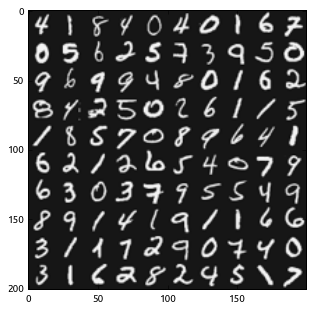

In [3]:
# Visualizing Data
fig = plt.figure(figsize=(5,5))
# initialize an array to store data
data_img = np.array(np.ones(200)).reshape(1,200)
m = X.shape[0]
for i in range(10):
    sel = rd.sample(range(1, m), 10) # randomly select 10 data points
    data1 = X[sel].reshape(200,20).T 
    data_img = np.concatenate([data_img,data1])
img = toimage(data_img) # from scipy.misc library
plt.imshow(img,cmap = cm.Greys_r)


## Loading Parameters 

In [4]:
# Load the weights into variables Theta1 and Theta2
dir_weights = os.getcwd() + '/ex4weights'
weights = from_octave.loadmat(dir_weights)
#assign variables
theta1 = np.array(weights['Theta1'],dtype='float')
theta2 = np.array(weights['Theta2'],dtype='float')
theta1.shape, theta2.shape

((25, 401), (10, 26))

 ## Compute Cost (Feedforward) 


In [5]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)
    
# Unroll parameters 
nn_params = np.concatenate([np.ravel(theta1),np.ravel(theta2)])
nn_params.shape

(10285,)

In [6]:
reload(fn)

# without regualariation term
# lambda_ = 0
cost , grad = fn.nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, 
                                X, y_onehot)

print 'Cost at parameters (loaded from ex4weights) : {}'.format(cost)

Cost at parameters (loaded from ex4weights) : 0.287629165161


##  Implement Regularization 

In [7]:
reload(fn)

# with regularization term
# lambda_ = 1

cost, grad = fn.nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels,
                               X, y_onehot,lambda_=1.)

print 'Cost at parameters (loaded from ex4weights) with regularization term : {}'.format(cost)

Cost at parameters (loaded from ex4weights) with regularization term : 0.381812896427


## Sigmoid Gradient

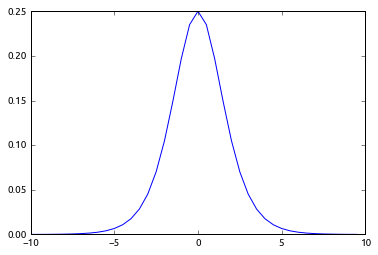

In [8]:
reload(fn)

# plot sigmoid gradient for a range of values
rang = np.arange(-10,10,.5)
plt.plot(rang,fn.sigmoidGradient(rang))

## Initializing Pameters

In [9]:
reload(fn)

initial_Theta1 = fn.randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = fn.randInitializeWeights(hidden_layer_size, num_labels)

# roll the random initial parameters
initial_nn_params = np.concatenate([np.ravel(initial_Theta1),np.ravel(initial_Theta2)])

initial_Theta1.shape,initial_Theta2.shape

((25, 401), (10, 26))

## Implement Backpropagation and Check gradients by running checkNNGradients

In [10]:
reload(fn)

'''
Creates a small neural network to check the
backpropagation gradients, it will output the analytical gradients
produced by your backprop code and the numerical gradients (computed
using computeNumericalGradient). These two gradient computations should
result in very similar values.
'''
def checkNNGradients(lambda_):
    input_layer_size_d = 3;
    hidden_layer_size_d = 5;
    num_labels_d = 3;
    m = 5;

    # We generate some 'random' test data
    theta1_d = fn.debugInitializeWeights(hidden_layer_size_d, input_layer_size_d);
    theta2_d = fn.debugInitializeWeights(num_labels_d, hidden_layer_size_d);
    # Reusing debugInitializeWeights to generate X_d
    X_d  = fn.debugInitializeWeights(m, input_layer_size_d - 1);

    # create the target variable y
    y_d = np.zeros((m,num_labels_d))
    y_vals  = np.random.randint(0, num_labels_d,m).reshape(m)
    for e in range(m):
        y_d[e, y_vals[e]] =1

    # Unroll parameters
    nn_params_d = np.concatenate([np.ravel(theta1_d),np.ravel(theta2_d)])

    # Short hand for cost function

    costFunc = lambda p : fn.nnCostFunction(p, input_layer_size_d, hidden_layer_size_d, num_labels_d,X_d, y_d,lambda_)
    cost_d , grad_d = costFunc(nn_params_d)

    numgrad_d = fn.computeNumericalGradient(costFunc, nn_params_d)
    
    
    diff = np.linalg.norm(numgrad_d- grad_d) / np.linalg.norm(grad_d+numgrad_d) 
    print ' If your backpropagation implementation is correct,\n then the relative difference \
    will be small (less than 1e-9). \n Relative Difference: is {}'.format( diff)
    
    # Visually examine the two gradient computations.  The two columns you get should be very similar. 
    print '\n------------------------------------------------------------'
    print 'The below two columns you get should be very similar.\n'
    print '(Left-Analytical Gradient, Right-Your Numerical Gradient )\n'
    for  e in range(grad_d.size/4):
        print grad_d[e] ,'\t\t', numgrad_d[e]
    
    if lambda_ == 0:
        print '\n------------------------------------------------------------'
        # this part is to show that jac is Jacobian (gradient) of objective function
        # and fun is the cost functions outcome

        fmin = opt.minimize(fun=costFunc, x0=nn_params_d,
                    method='TNC', jac=True, options={'maxiter':1})
        print 'The below two columns you get should be very similar.\n'
        print '(Left-Numerical Gradient , Right Gradient from jac )\n'

        for  e in range(grad_d.size/4):
            print fmin.jac[e] ,'\t\t', numgrad_d[e],'\t\t'


        print '\n------------------------------------------------------------'
        print 'compare the costs'
        print 'left is from fun right is from my function\n'
        print fmin.fun,cost_d



lambda_ = 0
checkNNGradients(lambda_)


 If your backpropagation implementation is correct,
 then the relative difference     will be small (less than 1e-9). 
 Relative Difference: is 1.73544463515e-11

------------------------------------------------------------
The below two columns you get should be very similar.

(Left-Analytical Gradient, Right-Your Numerical Gradient )

0.0123099895642 		0.0123099895522
0.000174167386289 		0.000174167387179
0.000262078647289 		0.000262078647673
0.000109036008609 		0.00010903600911
0.00273722153427 		0.00273722152944
0.000254703331616 		0.000254703331759
0.000341020383696 		0.000341020385264
0.000113804867702 		0.000113804867752
-0.00936414161347 		-0.00936414160435

------------------------------------------------------------
The below two columns you get should be very similar.

(Left-Numerical Gradient , Right Gradient from jac )

0.0123099895642 		0.0123099895522 		
0.000174167386289 		0.000174167387179 		
0.000262078647289 		0.000262078647673 		
0.000109036008609 		0.00010903600911

## Implement Regularization

In [11]:
reload(fn)
# Check gradients by running checkNNGradients
lambda_ = 3
checkNNGradients(3)

 If your backpropagation implementation is correct,
 then the relative difference     will be small (less than 1e-9). 
 Relative Difference: is 0.148238288543

------------------------------------------------------------
The below two columns you get should be very similar.

(Left-Analytical Gradient, Right-Your Numerical Gradient )

0.0127160350998 		0.0632042941806
0.054652439277 		0.0546524392786
0.00860967297133 		0.00860967297012
-0.0453487869586 		5.93627613732e-05
0.00527419412041 		-0.0522612623644
-0.0170293487004 		-0.0170293487045
0.0390210065031 		0.0390210065038
0.0591956282822 		-0.000165866516078
-0.00702301394932 		0.0177040951721


In [12]:
reload(fn)

# Also output the costFunction debugging values
a,b = fn.nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, 
                       X, y_onehot,lambda_=3)
print 'Cost at (fixed) debugging parameters (lambda = 3) :{}'.format(a)
print '\n(this value should be about 0.576051)'

Cost at (fixed) debugging parameters (lambda = 3) :0.570180358958

(this value should be about 0.576051)


## Training NN

In [13]:
reload(fn)

# set lambda
lambda_ = .5

# Create "short hand" for the cost function to be minimized
costFunction = lambda p : fn.nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels,X, y_onehot,lambda_)
cost , grad = costFunction(initial_nn_params)
cost

7.6041094976958883

In [14]:
# Minimize a scalar function of one or more variables using a truncated Newton (TNC) algorithm

fmin = opt.minimize(fun=costFunction, 
                    x0=initial_nn_params,
                    method='TNC', 
                    jac=True, 
                    options={'maxiter':150})

In [15]:
# Obtain Theta1 and Theta2 back from nn_params
theta1 = np.reshape(fmin.x[:hidden_layer_size*(input_layer_size+1)],(hidden_layer_size,input_layer_size+1))
theta2 = np.reshape(fmin.x[hidden_layer_size*(input_layer_size+1):],(num_labels,hidden_layer_size+1))

# Part 9: Visualize Weights

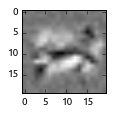

In [16]:
# Visualizing Data
fig = plt.figure(figsize=(1.5,1.5))
s = rd.sample(range(1,25), 1) # randomly seelct any theta1
sel =  theta1[:,1:][s,:].reshape(20,20)
img = toimage(sel) 
plt.imshow(img,cmap = cm.Greys_r)

# Part 10 :Implement Predict

In [17]:
reload(fn)

# add one since the y is from 1-10
y_hat = fn.predict(theta1, theta2, X)+1
print '\nTraining Set Accuracy = {0}%'.format(np.mean((y_hat == y.reshape(y.size)))*100)
 
print '\nThe total cost is: {}, which is around 0.5.'.format(fmin.fun)
print 'thats a good indicator that the algorithm is working.\n'

# an alternative way to calculate accuracy
# correct = [1 if a == b else 0 for (a, b) in zip(y_hat, y.reshape(y.size))]
# correctaccuracy = (sum(map(int, correct)) / float(len(correct)))
# print 'accuracy = {0}%'.format(accuracy * 100)


Training Set Accuracy = 98.5%

The total cost is: 0.275348712869, which is around 0.5.
thats a good indicator that the algorithm is working.

